In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
rcParams['figure.figsize']=(12,6)

In [2]:
import pandas as pd

In [3]:
p5=pd.HDFStore('/artemis/readout/adr_logs/standby_logs.h5',mode='r')
df = p5['logs']

In [4]:
df.columns

Index([u'921_R', u'922_1_V', u'922_2_V', u'922_3_V', u'922_4_V', u'923A1_R',
       u'923A2_R', u'960V', u'ADR 1K', u'ADR 50mK', u'Auxiliary', u'Current',
       u'H20 Inlet Temp', u'H20 Outlet Temp', u'Helium Temp',
       u'High Side Press', u'Log Comments', u'Low Side Press', u'Magnet Diode',
       u'Magnet RTD', u'Oil Temp', u'PS_I', u'PS_V', u'PT 3K', u'PT 60K',
       u'Pressure', u'RLeads', u'Test Time', u'Tset'],
      dtype='object')

In [14]:
df['water_delta'] = df['H20 Outlet Temp'] - df['H20 Inlet Temp']

In [15]:
df['oil_water_out'] = df['Oil Temp'] - df['H20 Outlet Temp']

In [17]:
df['helium_delta'] = df['High Side Press'] - df['Low Side Press']

In [19]:
byminute = df.iloc[::60]

# Overview of oil temperature to output water temperature differential

When the compressor is first turned on, the oil temperature gets somewhat higher than the water output temperature

When compressor is turned off, the oil is still hot (40+ deg C) but stops circulating, so the water cools faster than the oil

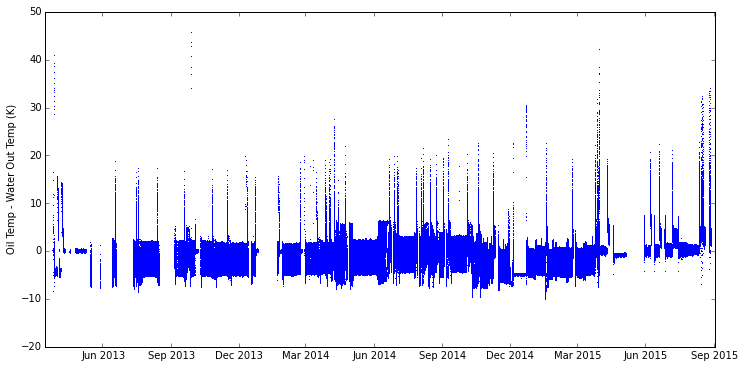

In [74]:
plot(byminute.index,byminute.oil_water_out,',')
ylabel('Oil Temp - Water Out Temp (K)')

In [52]:
july13 = df[df.index < pd.datetools.to_datetime('2013-07-01')]

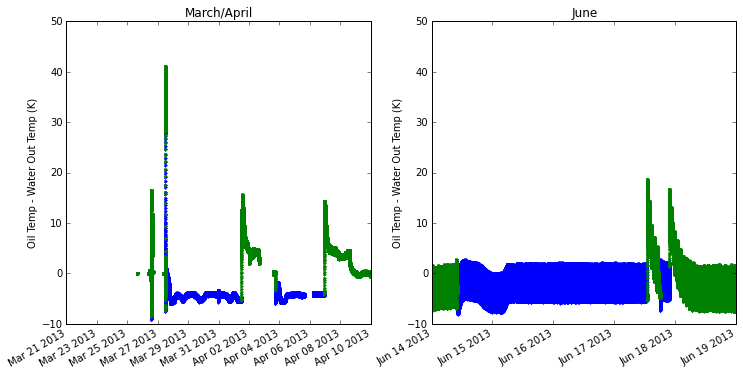

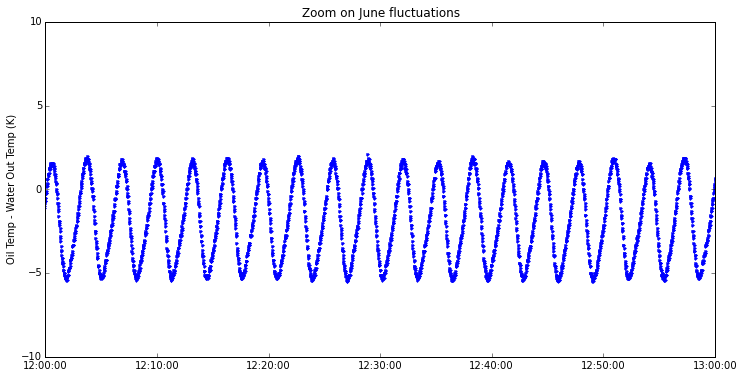

In [77]:
fig,(ax1,ax2) = plt.subplots(1,2)
on = july13[(july13.Current>0)]
off = july13[july13.Current==0]
ax1.plot(on.index,on.oil_water_out,'.')
ax1.plot(off.index,off.oil_water_out,'.')
ax1.set_xlim(pd.datetools.to_datetime('2013-03-21'),pd.datetools.to_datetime('2013-04-10'))
ax1.set_ylabel('Oil Temp - Water Out Temp (K)')
ax1.set_title('March/April')
ax2.plot(on.index,on.oil_water_out,'.')
ax2.plot(off.index,off.oil_water_out,'.')
ax2.set_xlim(pd.datetools.to_datetime('2013-06-14'),pd.datetools.to_datetime('2013-06-19'))
ax2.set_ylabel('Oil Temp - Water Out Temp (K)')
ax2.set_title('June')
fig.autofmt_xdate()
figure()
plot(on.index,on.oil_water_out,'.')
ylabel('Oil Temp - Water Out Temp (K)')
xlim(pd.datetools.to_datetime('2013-06-16 12:00:00',format='%Y-%m-%d %H:%M:%S'),pd.datetools.to_datetime('2013-06-16 13:00:00',format='%Y-%m-%d %H:%M:%S'))
ylim(-10,10)
title('Zoom on June fluctuations')

(-5, 30)

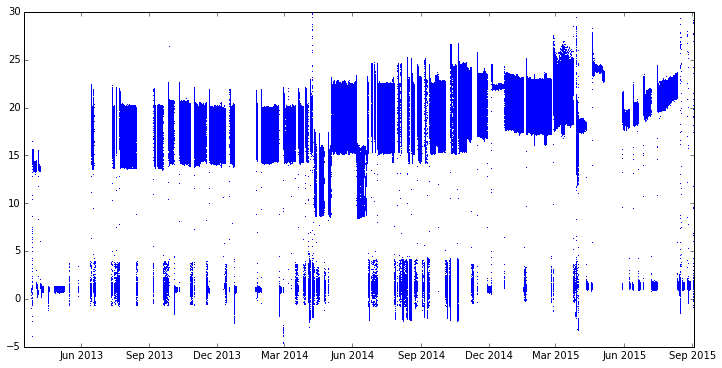

In [82]:
plot(byminute.index,byminute.water_delta,',')
ylim(-5,30)

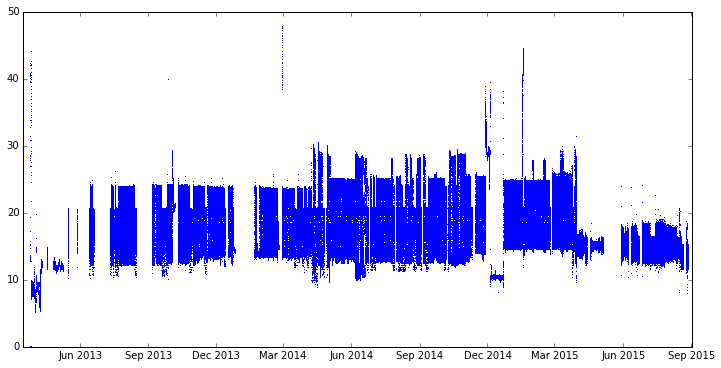

In [80]:
plot(byminute.index,byminute['H20 Inlet Temp'],',')

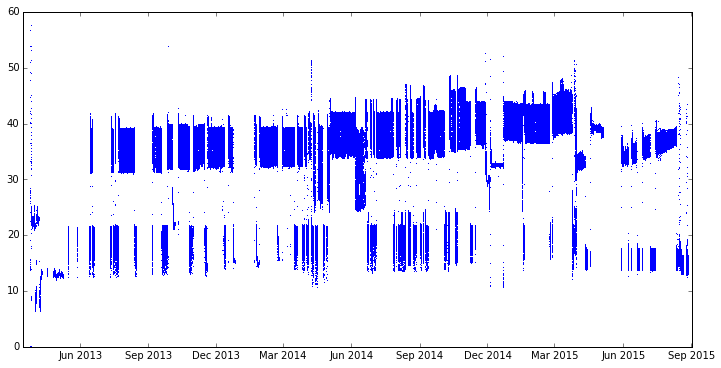

In [81]:
plot(byminute.index,byminute['H20 Outlet Temp'],',')

In [65]:
pd.datetools.to_datetime?

(2, 4)

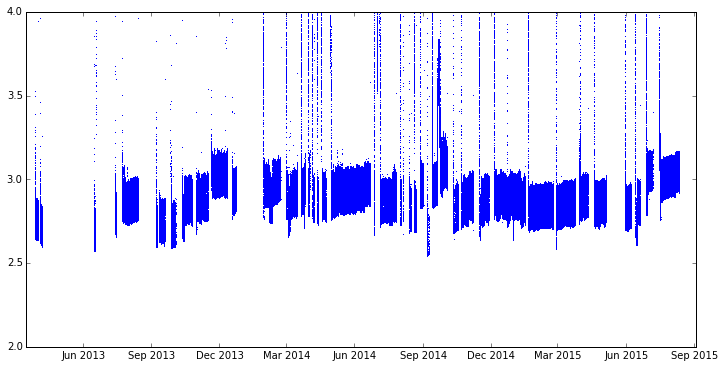

In [39]:
plot(byminute.index,byminute['PT 3K'],',')
ylim(2,4)

(40, 60)

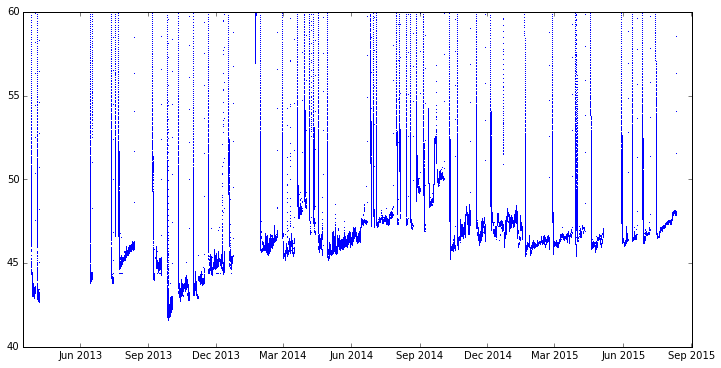

In [41]:
plot(byminute.index,byminute['PT 60K'],',')
ylim(40,60)

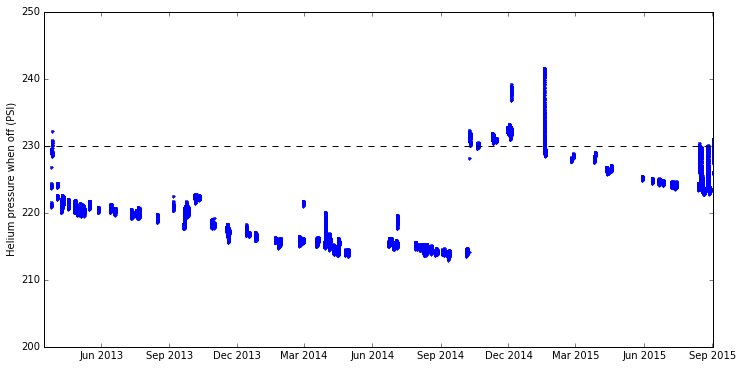

In [31]:
off = byminute[(byminute.Current==0) & (byminute['PT 3K'] > 280)]
plot(off.index,off['Low Side Press'],'.')
ylim(200,250)
ax = gca()
ax.axhline(230,linestyle='--',color='k')
ylabel('Helium pressure when off (PSI)')

In [16]:
df.shape

(39650850, 31)

In [12]:
aug = df[df.index > pd.datetools.to_datetime('2015-08-01')]

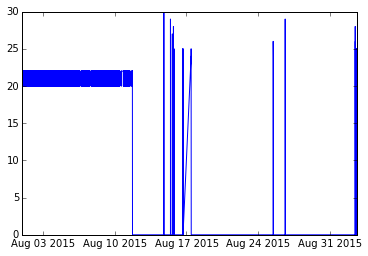

In [13]:
plot(aug.index,aug.Current)

In [85]:
len(r'''Objective: Develop open-source readout hardware and software for large format arrays of superconducting detectors, suitable for balloon-based and space-based telescopes. 

Methods: This work will build on the success of the CASPER signal processing collaboration. CASPER based instruments are in use at most major radio telescopes today. As a core CASPER developer, I will leverage my experience with the hardware and software tools, and my extensive collaborations within the community, to develop open-source low-power readout hardware for superconducting detectors. The instruments will initially be FPGA-based, suitable for laboratory testing and balloon-born telescopes. I will then migrate the designs to a space qualified FPGA or ASIC platform.

Significance: Superconducting detectors, including transition-edge sensor (TES) bolometers and microwave kinetic inductance detectors (MKIDs), represent the state of the art in performance at millimeter and submillimeter wavelengths, and thus will continue to the technology of choice for space-based telescopes observing at these frequencies. They are also capable of resolving the energy of individual photons at optical and shorter wavelengths, making them useful for integral field spectroscopy. Both technologies can be multiplexed with hundreds to thousands of detectors read out using a single microwave transmission line by incorporating the detectors in superconducting resonator circuits. The readout of these microwave frequency multiplexed detectors requires sophisticated digital signal processing systems. By leveraging the community-driven open-source CASPER model, this project will develop versatile readout hardware that will enable transformative advances in sensitivity and capability for future satellite instruments. 
''')

1793